<a href="https://colab.research.google.com/github/VyacheslavGusev/Big_Data/blob/main/PySpark_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [78.0 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,351 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:14 h

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz

In [ ]:
!tar -xvf spark-3.4.0-bin-hadoop3.tgz

spark-3.4.0-bin-hadoop3/
spark-3.4.0-bin-hadoop3/data/
spark-3.4.0-bin-hadoop3/data/streaming/
spark-3.4.0-bin-hadoop3/data/streaming/AFINN-111.txt
spark-3.4.0-bin-hadoop3/data/graphx/
spark-3.4.0-bin-hadoop3/data/graphx/followers.txt
spark-3.4.0-bin-hadoop3/data/graphx/users.txt
spark-3.4.0-bin-hadoop3/data/mllib/
spark-3.4.0-bin-hadoop3/data/mllib/als/
spark-3.4.0-bin-hadoop3/data/mllib/als/test.data
spark-3.4.0-bin-hadoop3/data/mllib/als/sample_movielens_ratings.txt
spark-3.4.0-bin-hadoop3/data/mllib/gmm_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_libsvm_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_svm_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_fpgrowth.txt
spark-3.4.0-bin-hadoop3/data/mllib/kmeans_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/pic_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/streaming_kmeans_data_test.txt
spark-3.4.0-bin-hadoop3/data/mllib/sample_linear_regression_data.txt
spark-3.4.0-bin-hadoop3/data/mllib/ridge-data/
spark-3.4.0-bin-hadoop3/data/

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.0-bin-hadoop3"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler, StringIndexer

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = spark.read.csv('churn.csv', inferSchema= True, header= True)
df.show()

+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+
|state|account_length|area_code|phone_number|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churned|
+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+------------

In [ ]:
df.describe().show()

+-------+-----+-----------------+-----------------+------------+------------------+---------------+---------------------+-----------------+----------------+------------------+------------------+-----------------+------------------+-------------------+-----------------+------------------+------------------+-----------------+------------------+-----------------------------+
|summary|state|   account_length|        area_code|phone_number|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes| total_day_calls|  total_day_charge| total_eve_minutes|  total_eve_calls|  total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes| total_intl_calls| total_intl_charge|number_customer_service_calls|
+-------+-----+-----------------+-----------------+------------+------------------+---------------+---------------------+-----------------+----------------+------------------+------------------+-----------------+------------------+-------------------

1. Построить гистограмму количества звонков в техническую поддержку

In [ ]:
number_of_calls = [v.number_customer_service_calls for v in df[['number_customer_service_calls']].collect()]

(array([1023., 1786., 1127.,  665.,  252.,   96.,   34.,   13.,    2.,
           2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

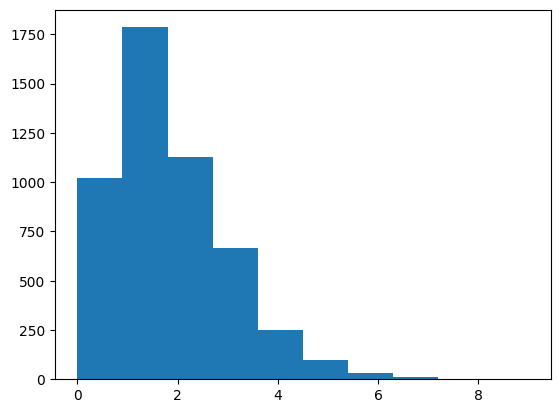

In [ ]:
plt.hist(number_of_calls)

In [ ]:
df.columns

['state',
 'account_length',
 'area_code',
 'phone_number',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churned']

2.Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны)

In [ ]:
df = df.withColumn('total_minutes', df['total_day_minutes']+df['total_eve_minutes']+df['total_night_minutes']+df['total_intl_minutes'] )

In [ ]:
df.show()

+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+------------------+
|state|account_length|area_code|phone_number|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churned|     total_minutes|
+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------

(array([  10.,   88.,  267.,  784., 1206., 1268.,  864.,  381.,  109.,
          23.]),
 array([284.3 , 344.37, 404.44, 464.51, 524.58, 584.65, 644.72, 704.79,
        764.86, 824.93, 885.  ]),
 <BarContainer object of 10 artists>)

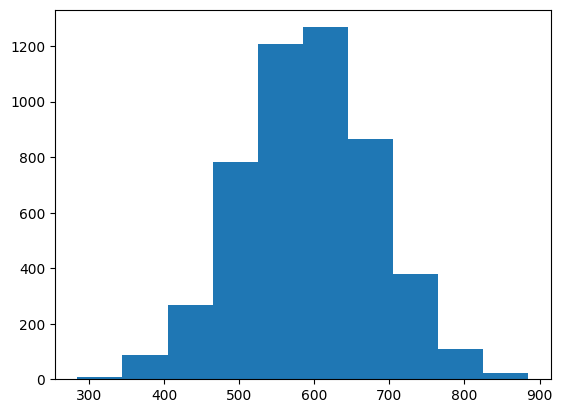

In [ ]:
plt.hist([v.total_minutes for v in df[['total_minutes']].collect()])

3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку

In [ ]:
from pyspark.sql.functions import mean as _mean, stddev as _stddev, sum as _sum, sqrt as _sqrt, pow as _pow, col

In [ ]:
df_stats = df.select(
    _mean(col('total_minutes')).alias('mean_calls'),
    _mean(col('number_customer_service_calls')).alias('mean_service')
).collect()

mean_calls = df_stats[0]['mean_calls']
mean_service = df_stats[0]['mean_service']

In [ ]:
df.select( (_sum( (col('total_minutes') - mean_calls) * (col('number_customer_service_calls') - mean_service ) ) /  _sqrt( _sum( _pow(col('total_minutes') - mean_calls, 2) ) * _sum( _pow(col('number_customer_service_calls') - mean_service, 2) ) )).alias('r')).collect()

[Row(r=-0.01140791082744116)]

4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

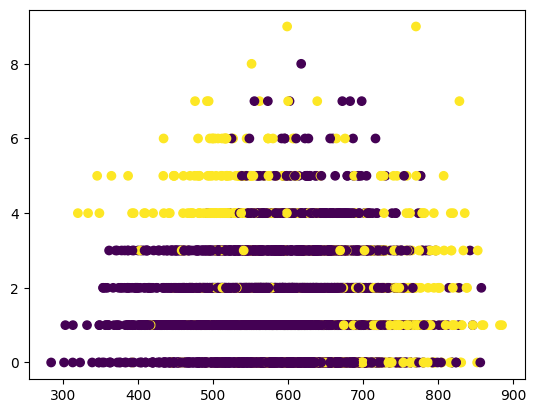

In [ ]:
plt.scatter(
    [v.total_minutes for v in df[['total_minutes']].collect()],
    number_of_calls,
    c=[v.churned for v in df[['churned']].collect()]
)

5. Вывести top-5 самых много и самых мало говорящих клиентов

In [ ]:
df.orderBy('total_minutes', ascending = False).show(5)

+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+-----------------+
|state|account_length|area_code|phone_number|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churned|    total_minutes|
+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+--------------

In [ ]:
df.orderBy('total_minutes', ascending = True).show(5)

+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+------------------+
|state|account_length|area_code|phone_number|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churned|     total_minutes|
+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------

6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора  в зависимости от штата

In [ ]:
df  = df.withColumn('day_minute_cost', col('total_day_charge')/ col('total_day_minutes'))

In [ ]:
df.withColumn('churned_int', col('churned').cast('int')).select('state', 'churned_int', 'day_minute_cost').groupby('state').mean().show()

+-----+-------------------+--------------------+
|state|   avg(churned_int)|avg(day_minute_cost)|
+-----+-------------------+--------------------+
|   AZ|0.10112359550561797| 0.17000187550447118|
|   SC|0.17582417582417584| 0.17000791222234876|
|   LA|0.08536585365853659| 0.17000424778238132|
|   MN|               0.16| 0.17000450198197306|
|   NJ|               0.25|  0.1700009208899428|
|   DC|0.10227272727272728| 0.17000856850114776|
|   OR|0.15789473684210525| 0.17000899578287715|
|   VA|0.05084745762711865| 0.17000288054980883|
|   RI| 0.0707070707070707|  0.1700044882289804|
|   WY|0.09565217391304348|   0.170003269363282|
|   KY|0.15151515151515152| 0.17000800973759486|
|   NH|0.12631578947368421| 0.17000429440804155|
|   MI|0.17475728155339806|  0.1700027573580645|
|   NV|0.18888888888888888| 0.17000296414860694|
|   WI|0.07547169811320754| 0.16999870695631594|
|   ID|0.11764705882352941| 0.17000328448548618|
|   CA| 0.2692307692307692| 0.17000349532173592|
|   NE|0.06818181818

7. перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark
8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)
9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas (в случае спарка - не надо)
10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке


In [ ]:
label_indexer = StringIndexer(inputCol = 'churned_int', outputCol = 'label')
cols = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']

In [ ]:
assembler = VectorAssembler(

    inputCols = cols,

    outputCol = 'features')

## Разобьем данные на данные для обучения и проверки

In [ ]:
(train, test) = df.withColumn('churned_int', col('churned').cast('int')).randomSplit([0.7, 0.3])

In [ ]:
train.show()

+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+----------------+-------------------+-----------------+------------------+------------------+----------------+-----------------+-----------------------------+-------+------------------+-------------------+-----------+
|state|account_length|area_code|phone_number|international_plan|voice_mail_plan|number_vmail_messages|total_day_minutes|total_day_calls|total_day_charge|total_eve_minutes|total_eve_calls|total_eve_charge|total_night_minutes|total_night_calls|total_night_charge|total_intl_minutes|total_intl_calls|total_intl_charge|number_customer_service_calls|churned|     total_minutes|    day_minute_cost|churned_int|
+-----+--------------+---------+------------+------------------+---------------+---------------------+-----------------+---------------+----------------+-----------------+---------------+---

In [ ]:
from pyspark.ml import Pipeline

from pyspark.ml.classification import RandomForestClassifier

classifier = RandomForestClassifier(labelCol = 'label', featuresCol = 'features')

pipeline = Pipeline(stages=[label_indexer, assembler, classifier])

model = pipeline.fit(train)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

predictions = model.transform(test)

evaluator = MulticlassClassificationEvaluator()

auroc = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})

In [ ]:
auroc

0.910547396528705